<a href="https://colab.research.google.com/github/rhks13/Remote-Internship/blob/main/1_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B3%91%ED%95%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

해당 파일에서 진행할 작업들은

1. 데이터 병합작업

2. 불필요 변수 제거

# **초기 세팅**

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 앞으로 필요할법한 라이브러리들을 불러옵니다
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pickle
import datetime

In [ ]:
# 교통사고 데이터 불러오기
# 저희는 엑셀데이터기 대문에 pd.read_excel 메서드를 통해서 파일들을 읽어옵니다.
# 뒤에 있는 index_col=0 은 0번째 열을 index로 지정한다는 뜻입니다.
acc1718 = pd.read_excel('/content/drive/MyDrive/cj E2-3/data/2017_2018_교통사고.xlsx',index_col=0)
acc1921 = pd.read_excel('/content/drive/MyDrive/cj E2-3/data/2019_2021_교통사고.xlsx', index_col=0)

In [ ]:
# 기상정보 불러오기
# 위와 동일한 방식으로 불러와주면 됩니다.
wea17  = pd.read_excel('/content/drive/MyDrive/cj E2-3/data/날씨 데이터/2017_날씨.xlsx', index_col=0)
wea18  = pd.read_excel('/content/drive/MyDrive/cj E2-3/data/날씨 데이터/2018_날씨.xlsx', index_col=0)
wea19  = pd.read_excel('/content/drive/MyDrive/cj E2-3/data/날씨 데이터/2019_날씨.xlsx', index_col=0)
wea20  = pd.read_excel('/content/drive/MyDrive/cj E2-3/data/날씨 데이터/2020_날씨.xlsx', index_col=0)
wea21  = pd.read_excel('/content/drive/MyDrive/cj E2-3/data/날씨 데이터/2021_날씨.xlsx', index_col=0)

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


# **데이터 병합작업**

## **1. 사고데이터 17 - 21년 데이터 병합**

우리는 우선 17년부터 21년까지의 데이터를 통합하려 합니다.


데이터를 단순히 위-아래 / 양옆으로 붙이는 데에는


판다스의 함수인 pd.concat 이라는 함수를 씁니다


 **ex) pd.concat([data1, data2],axis=0 or 1)**


axis의 값이 0이거나 해당 옵션을 사용하지 않는다면 위아래로, 1이라면 양옆으로 붙게됩니다

In [ ]:
acc1718

,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
사고번호,,,,,,,,,,,,,,,,,,,,,
2017010100100242,2017년 1월 1일 15시,일요일,제주특별자치도 제주시 애월읍,부상신고사고,0,0,0,1,차대차 - 기타,안전운전불이행,...,맑음,기타 - 기타,승용,남,29세,상해없음,승용,남,25세,부상신고
2017010100100319,2017년 1월 1일 18시,일요일,제주특별자치도 제주시 삼도이동,중상사고,0,1,0,0,차대사람 - 차도통행중,보행자보호의무위반,...,기타,단일로 - 기타,승용,남,42세,상해없음,보행자,남,70세,중상
2017010100100402,2017년 1월 1일 21시,일요일,제주특별자치도 서귀포시 남원읍,중상사고,0,1,0,0,차량단독 - 전도전복,안전운전불이행,...,맑음,교차로 - 교차로안,승용,남,47세,중상,미분류,미분류,미분류,미분류
2017010200100164,2017년 1월 2일 10시,월요일,제주특별자치도 서귀포시 성산읍,경상사고,0,0,1,0,차대차 - 측면충돌,직진우회전진행방해,...,맑음,교차로 - 교차로안,승용,남,24세,상해없음,건설기계,남,44세,경상
2017010300100536,2017년 1월 3일 21시,화요일,제주특별자치도 서귀포시 성산읍,경상사고,0,0,1,0,차량단독 - 공작물충돌,안전운전불이행,...,맑음,단일로 - 기타,승용,남,20세,상해없음,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018122700100461,2018년 12월 27일 18시,목요일,제주특별자치도 서귀포시 서귀동,경상사고,0,0,1,0,차대사람 - 기타,안전운전불이행,...,맑음,기타 - 기타,승용,여,27세,상해없음,보행자,남,59세,경상
2018122700100596,2018년 12월 27일 22시,목요일,제주특별자치도 제주시 조천읍,경상사고,0,0,1,0,차대차 - 측면충돌,안전거리미확보,...,맑음,단일로 - 기타,승용,남,26세,상해없음,승용,남,56세,경상
2018122800100201,2018년 12월 28일 11시,금요일,제주특별자치도 제주시 회천동,중상사고,0,1,1,0,차대차 - 추돌,안전운전불이행,...,눈,단일로 - 기타,승용,남,24세,경상,기타불명,기타불명,미분류,기타불명


In [ ]:
acc1921 

,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
사고번호,,,,,,,,,,,,,,,,,,,,,
2.019010e+15,2019년 1월 1일 09시,화요일,제주특별자치도 서귀포시 성산읍,경상사고,0.0,0.0,1.0,0.0,차대차 - 기타,안전거리미확보,...,맑음,단일로 - 기타,승용,남,24세,기타불명,승용,여,36세,경상
2.019010e+15,2019년 1월 4일 13시,금요일,제주특별자치도 서귀포시 토평동,중상사고,0.0,1.0,1.0,0.0,차대차 - 측면충돌,차로위반,...,맑음,단일로 - 기타,승용,여,27세,상해없음,승용,남,68세,중상
2.019011e+15,2019년 1월 5일 21시,토요일,제주특별자치도 제주시 노형동,경상사고,0.0,0.0,1.0,0.0,차대사람 - 기타,안전운전불이행,...,맑음,단일로 - 기타,승용,남,28세,상해없음,보행자,남,51세,경상
2.019011e+15,2019년 1월 5일 23시,토요일,제주특별자치도 제주시 연동,부상신고사고,0.0,0.0,0.0,1.0,차대사람 - 횡단중,안전운전불이행,...,맑음,단일로 - 기타,승용,남,26세,상해없음,보행자,남,39세,부상신고
2.019011e+15,2019년 1월 6일 09시,일요일,제주특별자치도 서귀포시 성산읍,부상신고사고,0.0,0.0,0.0,1.0,차대차 - 기타,교차로운행방법위반,...,맑음,교차로 - 교차로안,승용,남,24세,상해없음,승용,여,28세,부상신고
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.021123e+15,2021년 12월 28일 12시,화요일,제주특별자치도 제주시 일도이동,경상사고,0.0,0.0,1.0,0.0,차대사람 - 횡단중,안전운전불이행,...,맑음,교차로 - 교차로부근,승용,남,57세,상해없음,보행자,여,70세,경상
2.021123e+15,2021년 12월 29일 11시,수요일,제주특별자치도 제주시 일도일동,경상사고,0.0,0.0,1.0,0.0,차대사람 - 횡단중,보행자보호의무위반,...,맑음,단일로 - 기타,승용,여,21세,상해없음,보행자,남,29세,경상
2.021123e+15,2021년 12월 29일 14시,수요일,제주특별자치도 제주시 한림읍,경상사고,0.0,0.0,3.0,0.0,차대차 - 측면충돌,안전운전불이행,...,맑음,단일로 - 기타,승용,여,22세,상해없음,승용,여,34세,경상


두 데이터 프레임의 형태가(column)의 구성이 같으므로

pd.concat을 사용한다면 수월하게 합쳐질 것 같습니다.

In [ ]:
#acc 합치기
acc=pd.concat([acc1718,acc1921]) # acc1718, acc1921 데이터를 합쳐 acc 라는 새로운 데이터프레임에 저장시켰습니다.
acc # acc를 출력시켜 볼까요

,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
사고번호,,,,,,,,,,,,,,,,,,,,,
2.017010e+15,2017년 1월 1일 15시,일요일,제주특별자치도 제주시 애월읍,부상신고사고,0.0,0.0,0.0,1.0,차대차 - 기타,안전운전불이행,...,맑음,기타 - 기타,승용,남,29세,상해없음,승용,남,25세,부상신고
2.017010e+15,2017년 1월 1일 18시,일요일,제주특별자치도 제주시 삼도이동,중상사고,0.0,1.0,0.0,0.0,차대사람 - 차도통행중,보행자보호의무위반,...,기타,단일로 - 기타,승용,남,42세,상해없음,보행자,남,70세,중상
2.017010e+15,2017년 1월 1일 21시,일요일,제주특별자치도 서귀포시 남원읍,중상사고,0.0,1.0,0.0,0.0,차량단독 - 전도전복,안전운전불이행,...,맑음,교차로 - 교차로안,승용,남,47세,중상,미분류,미분류,미분류,미분류
2.017010e+15,2017년 1월 2일 10시,월요일,제주특별자치도 서귀포시 성산읍,경상사고,0.0,0.0,1.0,0.0,차대차 - 측면충돌,직진우회전진행방해,...,맑음,교차로 - 교차로안,승용,남,24세,상해없음,건설기계,남,44세,경상
2.017010e+15,2017년 1월 3일 21시,화요일,제주특별자치도 서귀포시 성산읍,경상사고,0.0,0.0,1.0,0.0,차량단독 - 공작물충돌,안전운전불이행,...,맑음,단일로 - 기타,승용,남,20세,상해없음,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.021123e+15,2021년 12월 28일 12시,화요일,제주특별자치도 제주시 일도이동,경상사고,0.0,0.0,1.0,0.0,차대사람 - 횡단중,안전운전불이행,...,맑음,교차로 - 교차로부근,승용,남,57세,상해없음,보행자,여,70세,경상
2.021123e+15,2021년 12월 29일 11시,수요일,제주특별자치도 제주시 일도일동,경상사고,0.0,0.0,1.0,0.0,차대사람 - 횡단중,보행자보호의무위반,...,맑음,단일로 - 기타,승용,여,21세,상해없음,보행자,남,29세,경상
2.021123e+15,2021년 12월 29일 14시,수요일,제주특별자치도 제주시 한림읍,경상사고,0.0,0.0,3.0,0.0,차대차 - 측면충돌,안전운전불이행,...,맑음,단일로 - 기타,승용,여,22세,상해없음,승용,여,34세,경상


## **2. 변수 정리**

위에 보시면 사고일시가 "###년 ##월 ##일 ##시" 의 형식으로 저장되어있습니다.


해당 데이터들의 자료형은 판다스에서 지원하는 날짜형식(datetime)이 아니라 단순 문자열(str)에 불과합니다.

대부분의 날짜데이터는 datetime 형식으로 구성되어있고, 후에 월이나 날짜를 계산하기에 용이하기때문에

저희는 여기서 str형식으로 저장되어있는 데이터를 datetime 형식으로 변환해주고자 합니다.

데이트 타임의 형식은
[YYYY-MM-DD HH:MM:SS] 의 형식으로 구성되기 때문에 문자열을 다음과 같이 대체해줄 것 입니다.  

In [ ]:
# 우선 데이터 한개만 가지고 바꿔보도록 할게요
acc.iloc[0,0]  # data.iloc[행 숫자, 열 숫자] => 데이터 프레임에서 해당 위치의 데이터가 뽑아져 나옴

'2017년 1월 1일 15시'

In [ ]:
# 이 친구를 잘 구워 삶아 볼까요
acc.iloc[0,0].replace('년','-')   # 문자열.replace('현재 문자','바꿀 문자')
# 이거를 월,일,시 까지 모두 진행하면 되겠죠

'2017- 1월 1일 15시'

그런데 우리는 이 작업을 ['사고일시'] 열의 모든 데이터에 대해 진행해주어야 합니다.

이럴때 저는 보통 apply 메서드를 사용합니다.

apply 메서드는 관련 함수를 하나 만들어서 열 전체에 적용시켜줍니다.

ex) 함수적용할열.apply(함수)

그럼 저희는 '년,월,일,시'를 '-'로 변경하는 함수를 만들어주고, 이를 사고일시 열 전체에 apply를 통해 적용하면 되겠죠

In [ ]:
# 사고일시를 datetime 형식으로 변환하기 위한 작업
# 후에 날씨데이터와 병합하기에 용이하게끔
def date(a):
  d = a.replace('년 ','-')
  d = d.replace('월 ','-')
  d = d.replace('일 ',' ')
  d = d.replace('시', ':00')
  return d

# 이렇게 datetime 형식으로 바꾸는 함수를 만들어주고

In [ ]:
# apply를 통해 적용시켜주고, 이를 기존값과 대체 해줍니다
acc.loc[:,'사고일시'] = pd.to_datetime(acc['사고일시'].apply(date))
# 그리고 pd.to_datetime() 함수를 통해 datetime자료형으로 만들어줍니다

In [ ]:
acc # 결과를 확인해볼까요

,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
사고번호,,,,,,,,,,,,,,,,,,,,,
2.017010e+15,2017-01-01 15:00:00,일요일,제주특별자치도 제주시 애월읍,부상신고사고,0.0,0.0,0.0,1.0,차대차 - 기타,안전운전불이행,...,맑음,기타 - 기타,승용,남,29세,상해없음,승용,남,25세,부상신고
2.017010e+15,2017-01-01 18:00:00,일요일,제주특별자치도 제주시 삼도이동,중상사고,0.0,1.0,0.0,0.0,차대사람 - 차도통행중,보행자보호의무위반,...,기타,단일로 - 기타,승용,남,42세,상해없음,보행자,남,70세,중상
2.017010e+15,2017-01-01 21:00:00,일요일,제주특별자치도 서귀포시 남원읍,중상사고,0.0,1.0,0.0,0.0,차량단독 - 전도전복,안전운전불이행,...,맑음,교차로 - 교차로안,승용,남,47세,중상,미분류,미분류,미분류,미분류
2.017010e+15,2017-01-02 10:00:00,월요일,제주특별자치도 서귀포시 성산읍,경상사고,0.0,0.0,1.0,0.0,차대차 - 측면충돌,직진우회전진행방해,...,맑음,교차로 - 교차로안,승용,남,24세,상해없음,건설기계,남,44세,경상
2.017010e+15,2017-01-03 21:00:00,화요일,제주특별자치도 서귀포시 성산읍,경상사고,0.0,0.0,1.0,0.0,차량단독 - 공작물충돌,안전운전불이행,...,맑음,단일로 - 기타,승용,남,20세,상해없음,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.021123e+15,2021-12-28 12:00:00,화요일,제주특별자치도 제주시 일도이동,경상사고,0.0,0.0,1.0,0.0,차대사람 - 횡단중,안전운전불이행,...,맑음,교차로 - 교차로부근,승용,남,57세,상해없음,보행자,여,70세,경상
2.021123e+15,2021-12-29 11:00:00,수요일,제주특별자치도 제주시 일도일동,경상사고,0.0,0.0,1.0,0.0,차대사람 - 횡단중,보행자보호의무위반,...,맑음,단일로 - 기타,승용,여,21세,상해없음,보행자,남,29세,경상
2.021123e+15,2021-12-29 14:00:00,수요일,제주특별자치도 제주시 한림읍,경상사고,0.0,0.0,3.0,0.0,차대차 - 측면충돌,안전운전불이행,...,맑음,단일로 - 기타,승용,여,22세,상해없음,승용,여,34세,경상


## **3. 날씨 데이터 병합**

In [ ]:
weather = pd.concat([wea17,wea18,wea19,wea20,wea21]) # 앞서 acc 만들었던 것 처럼 17-21의 날씨를 합쳐줍니다.

In [ ]:
weather # 대충 개형만 보아도 결측치가 많이 존재하는 것을 확인할 수 있습니다. 한번 제대로 파악해볼까요
        # 다양한 지점의 데이터들이 섞여있는 것 또한 확인할 수 있습니다. 이후에 제주와 서귀포만 분류해서 새로운 데이터 프레임을 생성합니다.

,지점명,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),적설(cm),시정(10m),지면온도(°C)
지점,,,,,,,,,,
184.0,제주,2017-01-01 00:00:00,6.0,NaN,2.3,69.0,1027.9,NaN,2000.0,5.1
184.0,제주,2017-01-01 01:00:00,6.6,NaN,2.6,66.0,1027.7,NaN,2000.0,5.5
184.0,제주,2017-01-01 02:00:00,7.1,NaN,2.4,65.0,1027.6,NaN,2000.0,5.8
184.0,제주,2017-01-01 03:00:00,7.5,NaN,2.7,64.0,1027.4,NaN,2000.0,6.2
184.0,제주,2017-01-01 04:00:00,8.1,NaN,2.4,64.0,1027.3,NaN,2000.0,6.6
...,...,...,...,...,...,...,...,...,...,...
189.0,서귀포,2021-12-31 19:00:00,5.4,NaN,1.1,65.0,1022.1,NaN,1754.0,6.8
189.0,서귀포,2021-12-31 20:00:00,4.8,NaN,0.6,67.0,1022.2,NaN,2000.0,6.1
189.0,서귀포,2021-12-31 21:00:00,5.1,NaN,1.7,72.0,1022.9,NaN,2000.0,5.3


In [ ]:
weather.isna() # 데이터.isna() 를 쓰면 결측치에 해당하는 자리에는 True, 값이 제대로 차있는 자리에는 False 가 할당됩니다.

,지점명,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),적설(cm),시정(10m),지면온도(°C)
지점,,,,,,,,,,
184.0,False,False,False,True,False,False,False,True,False,False
184.0,False,False,False,True,False,False,False,True,False,False
184.0,False,False,False,True,False,False,False,True,False,False
184.0,False,False,False,True,False,False,False,True,False,False
184.0,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
189.0,False,False,False,True,False,False,False,True,False,False
189.0,False,False,False,True,False,False,False,True,False,False
189.0,False,False,False,True,False,False,False,True,False,False


In [ ]:
weather.isna().sum() # 여기에 합계를 위해 sum을 때리면 각 변수별로 결측치가 몇개나 되는지 확인할 수 있죠
                     # 강수량과 적설량의 결측치가 어마무시하게 많은것을 확인할 수 있습니다. 

지점명               0
일시                0
기온(°C)           80
강수량(mm)      140556
풍속(m/s)         588
습도(%)            61
현지기압(hPa)        86
적설(cm)       156129
시정(10m)        3209
지면온도(°C)         68
dtype: int64

In [ ]:
# 강수량, 적설량의 결측치가 너무 많아
# -> 당일 강수 면 1, 아니면 0 
# 우선 지점별 분류부터 하고 진행

In [ ]:
# 지점별 분류를 위한 unique 값 출력
weather['지점명'].unique()

array(['제주', '고산', '성산', '서귀포'], dtype=object)

In [ ]:
weather['지점명']=='제주' # 이 true/false 값을 인덱싱에 그대로 적용하면 제주에만 해당하는 데이터를 얻을 수 있습니다.

지점
184.0     True
184.0     True
184.0     True
184.0     True
184.0     True
         ...  
189.0    False
189.0    False
189.0    False
189.0    False
189.0    False
Name: 지점명, Length: 157761, dtype: bool

In [ ]:
# 날씨데이터 지점별 분류
제주 = weather[weather['지점명']=='제주']
서귀포 = weather[weather['지점명']=='서귀포']
# 사고데이터와의 병합을 쉽게하기위해 제주와 서귀포만 사용

In [ ]:
제주

,지점명,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),적설(cm),시정(10m),지면온도(°C)
지점,,,,,,,,,,
184.0,제주,2017-01-01 00:00:00,6.0,NaN,2.3,69.0,1027.9,NaN,2000.0,5.1
184.0,제주,2017-01-01 01:00:00,6.6,NaN,2.6,66.0,1027.7,NaN,2000.0,5.5
184.0,제주,2017-01-01 02:00:00,7.1,NaN,2.4,65.0,1027.6,NaN,2000.0,5.8
184.0,제주,2017-01-01 03:00:00,7.5,NaN,2.7,64.0,1027.4,NaN,2000.0,6.2
184.0,제주,2017-01-01 04:00:00,8.1,NaN,2.4,64.0,1027.3,NaN,2000.0,6.6
...,...,...,...,...,...,...,...,...,...,...
184.0,제주,2021-12-31 19:00:00,4.8,NaN,5.6,67.0,1029.0,NaN,4857.0,4.9
184.0,제주,2021-12-31 20:00:00,4.5,NaN,4.8,65.0,1029.1,NaN,5000.0,4.6
184.0,제주,2021-12-31 21:00:00,4.1,NaN,4.2,64.0,1029.2,NaN,5000.0,4.3


In [ ]:
서귀포

,지점명,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),적설(cm),시정(10m),지면온도(°C)
지점,,,,,,,,,,
189.0,서귀포,2017-01-01 00:00:00,6.2,NaN,1.2,73.0,1023.4,NaN,2000.0,4.0
189.0,서귀포,2017-01-01 01:00:00,6.8,NaN,1.1,74.0,1023.3,NaN,2000.0,4.7
189.0,서귀포,2017-01-01 02:00:00,7.0,NaN,1.5,74.0,1023.0,NaN,2000.0,4.8
189.0,서귀포,2017-01-01 03:00:00,7.0,NaN,1.2,77.0,1023.2,NaN,2000.0,5.3
189.0,서귀포,2017-01-01 04:00:00,7.4,NaN,1.3,77.0,1022.9,NaN,2000.0,5.4
...,...,...,...,...,...,...,...,...,...,...
189.0,서귀포,2021-12-31 19:00:00,5.4,NaN,1.1,65.0,1022.1,NaN,1754.0,6.8
189.0,서귀포,2021-12-31 20:00:00,4.8,NaN,0.6,67.0,1022.2,NaN,2000.0,6.1
189.0,서귀포,2021-12-31 21:00:00,5.1,NaN,1.7,72.0,1022.9,NaN,2000.0,5.3


In [ ]:
# 비가 오는 날 / 눈이 오는 날 에 대한 변수를 만들어 봅시다

weather 데이터에는 시간별로 강수량이 기록되어 한번에 비가 오는 날과 눈이오는날을 구분하기 어렵습니다.

다른 방식도 많이 있을 수 있지만 제가 선택한 방식은 다음과 같습니다.

1. 비 / 눈 이 결측이 아닌 일시를 뽑아낸다

2. 해당 일시들의 시간 부분을 버리고 일자만 남겨두어 비오는날 / 눈 오는날 리스트를 만든다

3. 해당 리스트에 속하는 날이면 1, 아닌 날이면 0 인 변수를 새로 생성한다.

In [ ]:
제주['강수량(mm)'].isna()==False # 이걸 통해 결측이 아닌 행만 골라내고

지점
184.0    False
184.0    False
184.0    False
184.0    False
184.0    False
         ...  
184.0    False
184.0    False
184.0    False
184.0    False
184.0    False
Name: 강수량(mm), Length: 43823, dtype: bool

In [ ]:
rain = 제주['일시'][제주['강수량(mm)'].isna()==False] # 이렇게 일시에 적용합니다.

In [ ]:
def dately(a):
    b = a.date()   # date함수는 일자만 뽑아내줍니다.
    return b

In [ ]:
date_rain=rain.apply(dately) # apply로 모든 열에 대해 실행시켜 주고

In [ ]:
date_rain # 비오는 날의 일자들이 뽑혀져 나왔습니다.

지점
184.0    2017-01-02
184.0    2017-01-02
184.0    2017-01-02
184.0    2017-01-05
184.0    2017-01-05
            ...    
184.0    2021-12-27
184.0    2021-12-27
184.0    2021-12-29
184.0    2021-12-29
184.0    2021-12-31
Name: 일시, Length: 5153, dtype: object

In [ ]:
# 중복을 없애기 위해 unique() 함수를 사용합니다.
rainy_day=pd.to_datetime(date_rain.unique())
rainy_day # 비오는 날 리스트가 최종적으로 형성되었네요

DatetimeIndex(['2017-01-02', '2017-01-05', '2017-01-06', '2017-01-07',
               '2017-01-08', '2017-01-09', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-14',
               ...
               '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-18',
               '2021-12-19', '2021-12-25', '2021-12-26', '2021-12-27',
               '2021-12-29', '2021-12-31'],
              dtype='datetime64[ns]', length=821, freq=None)

In [ ]:
# 눈 오는 날도 똑같이 적용시켜 줍니다.
snow = 제주['일시'][제주['적설(cm)'].isna()==False]
date_snow=snow.apply(dately)
snowy_day=pd.to_datetime(date_snow.unique())
snowy_day

DatetimeIndex(['2017-01-23', '2017-02-09', '2017-02-10', '2017-02-11',
               '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-13',
               '2018-01-24', '2018-01-25', '2018-01-26', '2018-01-27',
               '2018-01-28', '2018-01-29', '2018-01-30', '2018-02-03',
               '2018-02-04', '2018-02-05', '2018-02-06', '2018-02-07',
               '2018-02-08', '2018-02-09', '2020-12-16', '2020-12-30',
               '2020-12-31', '2021-01-07', '2021-01-08', '2021-01-09',
               '2021-01-10', '2021-01-29', '2021-02-17', '2021-02-18',
               '2021-12-26', '2021-12-27'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
# 이제 변수를 집어넣기 위한 준비를 해보겠습니다.
# 우선 제주 데이터에 비,눈 열을 생성하고 기존의 강수량, 적설행을 삭제합니다.

In [ ]:
제주['비']=0
제주['눈']=0
제주.pop('강수량(mm)')
제주.pop('적설(cm)')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


지점
184.0   NaN
184.0   NaN
184.0   NaN
184.0   NaN
184.0   NaN
         ..
184.0   NaN
184.0   NaN
184.0   NaN
184.0   NaN
184.0   NaN
Name: 적설(cm), Length: 43823, dtype: float64

In [ ]:
# 제주 데이터의 일시도 시간단위까지 -> 날짜 리스트와 비교하기 위해서는 일자만 존재하는 리스트 생성시켜주어야
date_제주=제주['일시'].apply(dately)

In [ ]:
제주

,지점명,일시,기온(°C),풍속(m/s),습도(%),현지기압(hPa),시정(10m),지면온도(°C),비,눈
지점,,,,,,,,,,
184.0,제주,2017-01-01 00:00:00,6.0,2.3,69.0,1027.9,2000.0,5.1,0,0
184.0,제주,2017-01-01 01:00:00,6.6,2.6,66.0,1027.7,2000.0,5.5,0,0
184.0,제주,2017-01-01 02:00:00,7.1,2.4,65.0,1027.6,2000.0,5.8,0,0
184.0,제주,2017-01-01 03:00:00,7.5,2.7,64.0,1027.4,2000.0,6.2,0,0
184.0,제주,2017-01-01 04:00:00,8.1,2.4,64.0,1027.3,2000.0,6.6,0,0
...,...,...,...,...,...,...,...,...,...,...
184.0,제주,2021-12-31 19:00:00,4.8,5.6,67.0,1029.0,4857.0,4.9,0,0
184.0,제주,2021-12-31 20:00:00,4.5,4.8,65.0,1029.1,5000.0,4.6,0,0
184.0,제주,2021-12-31 21:00:00,4.1,4.2,64.0,1029.2,5000.0,4.3,0,0


In [ ]:
제주.loc[pd.to_datetime(date_제주).isin(rainy_day),'비']=1  # a.isin(b) 는 a 중에서 b에 속하는 값이라면 True, 아니라면 False를 반환하는 함수입니다.
제주.loc[pd.to_datetime(date_제주).isin(snowy_day),'눈']=1  # 이를 통해 비, 눈 열을 생성해줍니다.

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
제주

,지점명,일시,기온(°C),풍속(m/s),습도(%),현지기압(hPa),시정(10m),지면온도(°C),비,눈
지점,,,,,,,,,,
184.0,제주,2017-01-01 00:00:00,6.0,2.3,69.0,1027.9,2000.0,5.1,0,0
184.0,제주,2017-01-01 01:00:00,6.6,2.6,66.0,1027.7,2000.0,5.5,0,0
184.0,제주,2017-01-01 02:00:00,7.1,2.4,65.0,1027.6,2000.0,5.8,0,0
184.0,제주,2017-01-01 03:00:00,7.5,2.7,64.0,1027.4,2000.0,6.2,0,0
184.0,제주,2017-01-01 04:00:00,8.1,2.4,64.0,1027.3,2000.0,6.6,0,0
...,...,...,...,...,...,...,...,...,...,...
184.0,제주,2021-12-31 19:00:00,4.8,5.6,67.0,1029.0,4857.0,4.9,1,0
184.0,제주,2021-12-31 20:00:00,4.5,4.8,65.0,1029.1,5000.0,4.6,1,0
184.0,제주,2021-12-31 21:00:00,4.1,4.2,64.0,1029.2,5000.0,4.3,1,0


In [ ]:
# 서귀포도 똑같이 진행해줍니다.

rain=서귀포.groupby(['일시','강수량(mm)']).sum().reset_index()
date_rain=rain['일시'].apply(dately)
rainy_day=pd.to_datetime(date_rain.unique())
snow=weather.groupby(['일시','적설(cm)']).sum().reset_index()
date_snow=snow['일시'].apply(dately)
snowy_day=pd.to_datetime(date_snow.unique())
date_서귀포=서귀포['일시'].apply(dately)
서귀포['비']=0
서귀포['눈']=0
서귀포.loc[pd.to_datetime(date_서귀포).isin(rainy_day),'비']=1
서귀포.loc[pd.to_datetime(date_서귀포).isin(snowy_day),'눈']=1
서귀포.pop('강수량(mm)')
서귀포.pop('적설(cm)')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

지점
189.0   NaN
189.0   NaN
189.0   NaN
189.0   NaN
189.0   NaN
         ..
189.0   NaN
189.0   NaN
189.0   NaN
189.0   NaN
189.0   NaN
Name: 적설(cm), Length: 43821, dtype: float64

In [ ]:
서귀포

,지점명,일시,기온(°C),풍속(m/s),습도(%),현지기압(hPa),시정(10m),지면온도(°C),비,눈
지점,,,,,,,,,,
189.0,서귀포,2017-01-01 00:00:00,6.2,1.2,73.0,1023.4,2000.0,4.0,0,0
189.0,서귀포,2017-01-01 01:00:00,6.8,1.1,74.0,1023.3,2000.0,4.7,0,0
189.0,서귀포,2017-01-01 02:00:00,7.0,1.5,74.0,1023.0,2000.0,4.8,0,0
189.0,서귀포,2017-01-01 03:00:00,7.0,1.2,77.0,1023.2,2000.0,5.3,0,0
189.0,서귀포,2017-01-01 04:00:00,7.4,1.3,77.0,1022.9,2000.0,5.4,0,0
...,...,...,...,...,...,...,...,...,...,...
189.0,서귀포,2021-12-31 19:00:00,5.4,1.1,65.0,1022.1,1754.0,6.8,1,0
189.0,서귀포,2021-12-31 20:00:00,4.8,0.6,67.0,1022.2,2000.0,6.1,1,0
189.0,서귀포,2021-12-31 21:00:00,5.1,1.7,72.0,1022.9,2000.0,5.3,1,0


## **4. 전체 데이터 병합작업**

이제 사고데이터와 날씨데이터를 결합시켜 줍니다.

저희는 모든 날씨데이터가 필요한 것이 아니라, acc에 데이터의 일시에 해당하는 날씨가 필요합니다.

이렇게 조건에 알맞은 병합을 하기위해서는 pd.merge 함수를 사용합니다.

ex) pd.merge (데이터1, 데이터2, how='left', on='일시')


   => 이 코드를 해석해보자면 데이터 1과 데이터 2를 병합해라


       how = 'left' -> 왼쪽에 있는 데이터1을 기준으로 병합해라
       on='일시' -> 데이터1의 일시와 일치하는 데이터2의 데이터가 있다면 가져와라


이러한 메커니즘으로 동작합니다.

저희가 이 merge를 위해 준비해야 하는 것은

1. 병합의 기준이 되는 셀 이름 일치시키기

2. 제주와 서귀포 날씨를 각각 붙여야 하니 관련 변수 생성하기

In [ ]:
# 셀 이름을 일치시키기 위해 acc의 '사고일시'를 '일시' 로 변경합니다.
acc.rename(columns={'사고일시':'일시'},inplace=True) # data.rename(columns={'기존 변수명':'바꿀변수명'},inplace=바뀐데이터를 원본대신 저장할지 말지)

In [ ]:
acc # 일시로 이쁘게 바뀐것을 확인할 수 있습니다.

,일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
사고번호,,,,,,,,,,,,,,,,,,,,,
2.017010e+15,2017-01-01 15:00:00,일요일,제주특별자치도 제주시 애월읍,부상신고사고,0.0,0.0,0.0,1.0,차대차 - 기타,안전운전불이행,...,맑음,기타 - 기타,승용,남,29세,상해없음,승용,남,25세,부상신고
2.017010e+15,2017-01-01 18:00:00,일요일,제주특별자치도 제주시 삼도이동,중상사고,0.0,1.0,0.0,0.0,차대사람 - 차도통행중,보행자보호의무위반,...,기타,단일로 - 기타,승용,남,42세,상해없음,보행자,남,70세,중상
2.017010e+15,2017-01-01 21:00:00,일요일,제주특별자치도 서귀포시 남원읍,중상사고,0.0,1.0,0.0,0.0,차량단독 - 전도전복,안전운전불이행,...,맑음,교차로 - 교차로안,승용,남,47세,중상,미분류,미분류,미분류,미분류
2.017010e+15,2017-01-02 10:00:00,월요일,제주특별자치도 서귀포시 성산읍,경상사고,0.0,0.0,1.0,0.0,차대차 - 측면충돌,직진우회전진행방해,...,맑음,교차로 - 교차로안,승용,남,24세,상해없음,건설기계,남,44세,경상
2.017010e+15,2017-01-03 21:00:00,화요일,제주특별자치도 서귀포시 성산읍,경상사고,0.0,0.0,1.0,0.0,차량단독 - 공작물충돌,안전운전불이행,...,맑음,단일로 - 기타,승용,남,20세,상해없음,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.021123e+15,2021-12-28 12:00:00,화요일,제주특별자치도 제주시 일도이동,경상사고,0.0,0.0,1.0,0.0,차대사람 - 횡단중,안전운전불이행,...,맑음,교차로 - 교차로부근,승용,남,57세,상해없음,보행자,여,70세,경상
2.021123e+15,2021-12-29 11:00:00,수요일,제주특별자치도 제주시 일도일동,경상사고,0.0,0.0,1.0,0.0,차대사람 - 횡단중,보행자보호의무위반,...,맑음,단일로 - 기타,승용,여,21세,상해없음,보행자,남,29세,경상
2.021123e+15,2021-12-29 14:00:00,수요일,제주특별자치도 제주시 한림읍,경상사고,0.0,0.0,3.0,0.0,차대차 - 측면충돌,안전운전불이행,...,맑음,단일로 - 기타,승용,여,22세,상해없음,승용,여,34세,경상


In [ ]:
# 이번엔 시군구를 변경시켜볼까요
# 제주특별자치도는 어차피 필요없고
# 제주시/ 서귀포시 를 구분하는 '시'변수,
# 추가 지역정보를 반영하는 읍면동 변수를 생성해보겠습니다.

In [ ]:
# 다행이도 띄어쓰기로 정갈하게 구분이 되어있습니다. 이런경우에는 split함수를 사용하면 편리합니다.
acc['시군구'].iloc[0]

'제주특별자치도 제주시 애월읍'

In [ ]:
acc['시군구'].iloc[0].split()

['제주특별자치도', '제주시', '애월읍']

In [ ]:
# 여기서 두번째 걸 선택하면 시, 세번째 것을 선택하면 읍면동이 생기겠군요
# 하지만 아쉽게도 제주와 서귀포 데이터의 지점명은 제주시, 서귀포시 가 아닌 제주, 서귀포 이렇게 저장되어있습니다
# 따라서 시를 선택할때는 뒤의 한글자는 버려줍니다.

In [ ]:
# 새로운 변수 생성
acc["시"]=0
acc['읍면동']=0

In [ ]:
def loc(a):
  b = a.split()[1][:-1]
  return b

def loc2(a):
  b = a.split()[2]
  return b

In [ ]:
acc['시'] = acc['시군구'].apply(loc)
acc['읍면동'] = acc['시군구'].apply(loc2)

In [ ]:
acc

,일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,...,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,시,읍면동
사고번호,,,,,,,,,,,,,,,,,,,,,
2.017010e+15,2017-01-01 15:00:00,일요일,제주특별자치도 제주시 애월읍,부상신고사고,0.0,0.0,0.0,1.0,차대차 - 기타,안전운전불이행,...,승용,남,29세,상해없음,승용,남,25세,부상신고,제주,애월읍
2.017010e+15,2017-01-01 18:00:00,일요일,제주특별자치도 제주시 삼도이동,중상사고,0.0,1.0,0.0,0.0,차대사람 - 차도통행중,보행자보호의무위반,...,승용,남,42세,상해없음,보행자,남,70세,중상,제주,삼도이동
2.017010e+15,2017-01-01 21:00:00,일요일,제주특별자치도 서귀포시 남원읍,중상사고,0.0,1.0,0.0,0.0,차량단독 - 전도전복,안전운전불이행,...,승용,남,47세,중상,미분류,미분류,미분류,미분류,서귀포,남원읍
2.017010e+15,2017-01-02 10:00:00,월요일,제주특별자치도 서귀포시 성산읍,경상사고,0.0,0.0,1.0,0.0,차대차 - 측면충돌,직진우회전진행방해,...,승용,남,24세,상해없음,건설기계,남,44세,경상,서귀포,성산읍
2.017010e+15,2017-01-03 21:00:00,화요일,제주특별자치도 서귀포시 성산읍,경상사고,0.0,0.0,1.0,0.0,차량단독 - 공작물충돌,안전운전불이행,...,승용,남,20세,상해없음,NaN,NaN,NaN,NaN,서귀포,성산읍
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.021123e+15,2021-12-28 12:00:00,화요일,제주특별자치도 제주시 일도이동,경상사고,0.0,0.0,1.0,0.0,차대사람 - 횡단중,안전운전불이행,...,승용,남,57세,상해없음,보행자,여,70세,경상,제주,일도이동
2.021123e+15,2021-12-29 11:00:00,수요일,제주특별자치도 제주시 일도일동,경상사고,0.0,0.0,1.0,0.0,차대사람 - 횡단중,보행자보호의무위반,...,승용,여,21세,상해없음,보행자,남,29세,경상,제주,일도일동
2.021123e+15,2021-12-29 14:00:00,수요일,제주특별자치도 제주시 한림읍,경상사고,0.0,0.0,3.0,0.0,차대차 - 측면충돌,안전운전불이행,...,승용,여,22세,상해없음,승용,여,34세,경상,제주,한림읍


In [ ]:
acc.pop('시군구') # 시군구 변수를 제외해줍니다.

사고번호
2.017010e+15     제주특별자치도 제주시 애월읍
2.017010e+15    제주특별자치도 제주시 삼도이동
2.017010e+15    제주특별자치도 서귀포시 남원읍
2.017010e+15    제주특별자치도 서귀포시 성산읍
2.017010e+15    제주특별자치도 서귀포시 성산읍
                      ...       
2.021123e+15    제주특별자치도 제주시 일도이동
2.021123e+15    제주특별자치도 제주시 일도일동
2.021123e+15     제주특별자치도 제주시 한림읍
2.021123e+15    제주특별자치도 서귀포시 색달동
2.021123e+15     제주특별자치도 제주시 애월읍
Name: 시군구, Length: 2738, dtype: object

In [ ]:
# 제주와 서귀포를 합쳐줍니다 (한번에 acc와 합치기 위해)
# 지점명 변수명을 시 로 변경해줍니다 (merge를 위해서는 변수명이 같아야하니까)
날씨 = pd.concat([제주,서귀포])
날씨.rename(columns={'지점명':'시'},inplace=True)

In [ ]:
# 합쳐버립니다!
df=pd.merge(acc,날씨,how='left',on=['일시','시'])

In [ ]:
df.iloc[:,[1,3,4,5,20,21,22,23,24]]

,요일,사망자수,중상자수,경상자수,시,읍면동,기온(°C),풍속(m/s),습도(%)
0,일요일,0.0,0.0,0.0,제주,애월읍,11.9,3.4,63.0
1,일요일,0.0,1.0,0.0,제주,삼도이동,10.7,1.4,69.0
2,일요일,0.0,1.0,0.0,서귀포,남원읍,11.2,0.7,70.0
3,월요일,0.0,0.0,1.0,서귀포,성산읍,11.9,0.2,90.0
4,화요일,0.0,0.0,1.0,서귀포,성산읍,10.5,1.1,76.0
...,...,...,...,...,...,...,...,...,...
2733,화요일,0.0,0.0,1.0,제주,일도이동,8.0,2.5,60.0
2734,수요일,0.0,0.0,1.0,제주,일도일동,10.9,5.4,57.0
2735,수요일,0.0,0.0,3.0,제주,한림읍,10.4,5.7,60.0
2736,목요일,0.0,0.0,1.0,서귀포,색달동,8.2,3.7,45.0


In [ ]:
# 병합데이터 생성 완료

In [ ]:
# 병합데이터 결측치 파악
df.isnull().sum()

일시              0
요일              0
사고내용            0
사망자수            0
중상자수            0
경상자수            0
부상신고자수          0
사고유형            0
법규위반            0
노면상태            0
기상상태            0
도로형태            0
가해운전자 차종        0
가해운전자 성별        0
가해운전자 연령        0
가해운전자 상해정도      0
피해운전자 차종      215
피해운전자 성별      215
피해운전자 연령      215
피해운전자 상해정도    215
시               0
읍면동             0
기온(°C)          1
풍속(m/s)         0
습도(%)           0
현지기압(hPa)       0
시정(10m)         1
지면온도(°C)        1
비               0
눈               0
dtype: int64

# **불필요 변수 제거**

In [ ]:
df_one = df.copy()

In [ ]:
df_one.pop('사망자수')
df_one.pop('중상자수')
df_one.pop('경상자수')
df_one.pop('부상신고자수')
df_one.pop('피해운전자 차종')
df_one.pop('피해운전자 성별')
df_one.pop('피해운전자 연령')
df_one.pop('피해운전자 상해정도')

0       부상신고
1         중상
2        미분류
3         경상
4        NaN
        ... 
2733      경상
2734      경상
2735      경상
2736      경상
2737    부상신고
Name: 피해운전자 상해정도, Length: 2738, dtype: object

In [ ]:
df_one.pop('법규위반')
df_one.pop('기상상태')

0       맑음
1       기타
2       맑음
3       맑음
4       맑음
        ..
2733    맑음
2734    맑음
2735    맑음
2736    맑음
2737    맑음
Name: 기상상태, Length: 2738, dtype: object

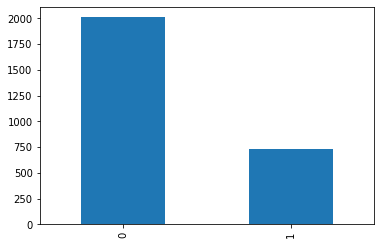

In [ ]:
# 종속변수 생성
df_one.loc[df_one['사고내용'].isin(['부상신고사고','경상사고']),'사고내용']=0
df_one.loc[df_one['사고내용'].isin(['중상사고','사망사고']),'사고내용']=1

df_one['사고내용'].value_counts().plot(kind='bar')

In [ ]:
df_one.to_csv('/content/drive/MyDrive/cj E2-3/data/병합데이터.csv')